<h1> <a href = "https://www.kaggle.com/c/happy-whale-and-dolphin/overview"> Happywhale - Whale and Dolphin Identification </a> </h1>

<h4> Hi There </h4>
<p> Here I have tried to understand the data and try out multiple augmentation techniques for this competition. I will continue adding newer things to this notebook as time goes on. I hope you enjoy! </p>
<b> HAPPY WHALING !!</b>

<h2> What do we have to do in this competition ?? </h2>

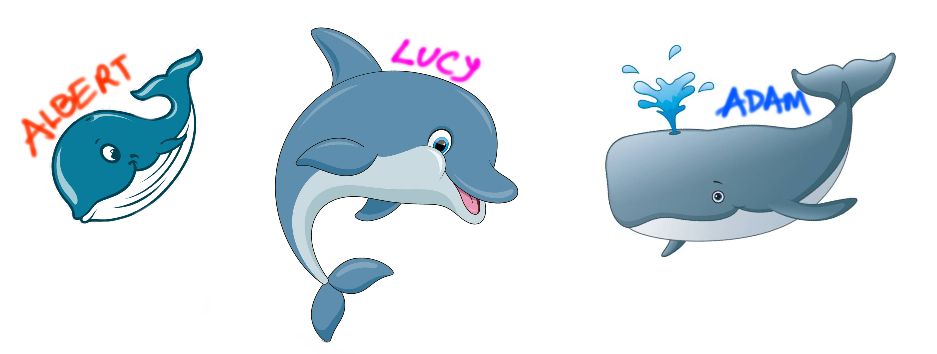

<h4>Each one of us has different names. And so do dolphins and whales. Scientists use these to identify and track them. We humans don't speak the language of whales and dolphins. So, we use technology to identify them.<b> In this competition we have to match the pictures of whales and dolphins to their names. </b></h4>

<h3> Importing Libraries </h3>

In [ ]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import albumentations as alb
import os
from IPython.display import display, HTML
from tqdm.notebook import tqdm
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


In [ ]:
train_df = pd.read_csv("../input/happy-whale-and-dolphin/train.csv")
train_df.head().style.set_table_styles(
   [{
       'selector': 'th',
       'props': [('background-color', '#add8e6')]
   }])

In [ ]:
train_df.shape

<h2> Let's see how many unique species are there and what they are </h2>

In [ ]:
print ("NUMBER OF UNIQUE SPECIES = " , train_df['species'].nunique())

In [ ]:
print("SPECIES NAMES: " ,list(train_df["species"].unique()))

In [ ]:
train_df['individual_id'].nunique()

<h4> That looks a bit unintuitive. Let's take a look at  a prettier version. </h4>

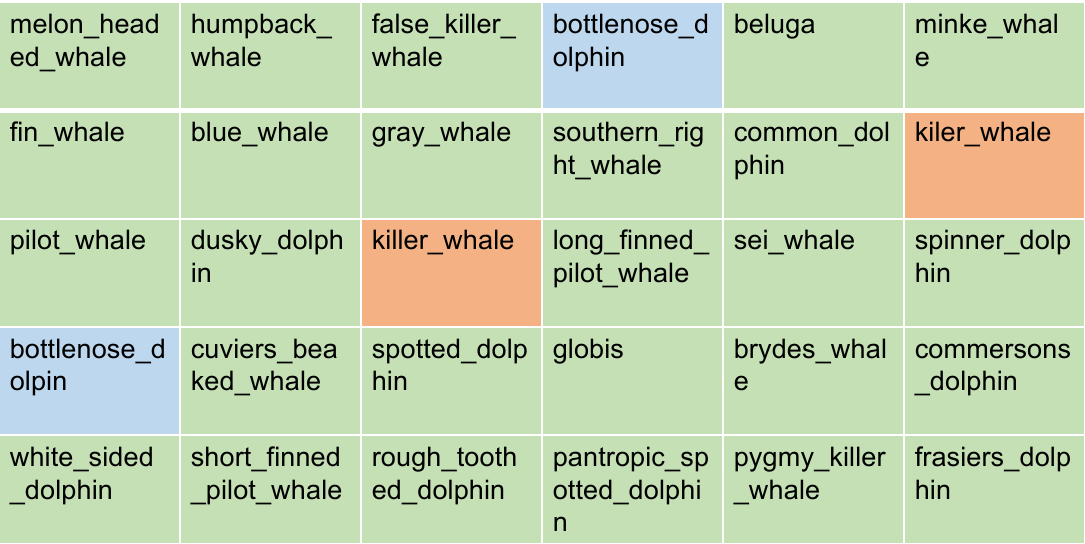

As it is clearly visible, 'killer_whale' and 'kiler_whale' are duplicates and so are 'bottlenose_dolphin' and 'bottlenose_dolpin'. 
I think it is safe to assume that we can consider them as just spelling errors and we can merge those two species. But, it can casue us some troubles if there are overlaps between individual IDs as well. Lets find out if we have some overlapping IDs.

In [ ]:
killer_whale = []
kiler_whale = []
bottlenose_dolpin = []
bottlenose_dolphin = []
for i in tqdm(range(train_df.shape[0])):
    if train_df.species[i] == 'killer_whale':
        killer_whale.append(train_df.individual_id[i])
    elif train_df.species[i] == 'kiler_whale':
        kiler_whale.append(train_df.individual_id[i])
    elif train_df.species[i] == 'bottlenose_dolphin':
        bottlenose_dolphin.append(train_df.individual_id[i])
    elif train_df.species[i] == 'bottlenose_dolpin':
        bottlenose_dolpin.append(train_df.individual_id[i])

<h3> Let's see of there are any overlaps </h3>
<ul>
    <li> First we will convert each list to a set </li>
    <li> Then we will find intersection between these sets</li>
    </ul>

In [ ]:
kw_set = set.intersection(set(killer_whale), set(kiler_whale))
bnd_set = set.intersection(set(bottlenose_dolphin), set(bottlenose_dolpin))
print(kw_set , bnd_set)

<h3> Good News !! </h3>
<p> There are no weird overlaps. It's just a small spelling error. Phew </p>
<p> So, now we can just merge these species and remove this error </p>

In [ ]:
for i in tqdm(range(train_df.shape[0])):
    if train_df.species[i] == 'kiler_whale':
        train_df.species[i] = 'killer_whale'
    elif train_df.species[i] == 'bottlenose_dolpin':
        train_df.species[i] = 'bottlenose_dolphin'

So, now we should have only 28 unique species

In [ ]:
train_df['species'].nunique()

P.S.
<p>After writing this part of the code, I found <a href="https://www.kaggle.com/c/happy-whale-and-dolphin/discussion/304633">this discussion here</a> that discusses on this </p>

<h3>How many types of whales and how many types of dolphins do we have ? </h3>

In [ ]:
whale_species = []
dolphin_species = []
for i in tqdm(range(train_df.shape[0])):
    if (("whale" in train_df['species'][i]) or ('beluga' in train_df['species'][i]) or ('globis' in train_df['species'][i])):
        if train_df.species[i] not in whale_species: 
            whale_species.append(train_df['species'][i])
        
    elif 'dolphin' in train_df.species[i]:
        if train_df.species[i] not in dolphin_species:
            dolphin_species.append(train_df['species'][i])    
    else:
        continue
        
class_ = ['whale' , 'dolphin']
fig = px.bar(x=[len(whale_species) , len(dolphin_species)] , y=class_ , color = class_,  title = 'type')
fig.show()

So, we have <ul>
    <li><h3> 10 species of dolphins </h3> </li>
    <li><h3>18 species of whales</h3></li>
    </ul>

In [ ]:
whale_species

In [ ]:
dolphin_species

<h3> How may whales and how many dolphins do we have? </h3>

In [ ]:
whale_counter = 0
dolphin_counter = 0
for i in tqdm(range(train_df.shape[0])):
    if (("whale" in train_df['species'][i]) or ('beluga' in train_df['species'][i]) or ('globis' in train_df['species'][i])):
        whale_counter += 1
    else :
        dolphin_counter += 1
        
class_ = ['whale' , 'dolphin']
fig = px.bar(x=[whale_counter , dolphin_counter] , y=class_ , color = class_,  title = 'type')
fig.show()

In [ ]:
data = train_df.species.value_counts().reset_index()
fig = px.bar(data, x='index', y='species', color='species',title='Species', text_auto=True)
fig.show()

<h3> OBSERVATIONS </h3>
<ul>
    <li>There are lot less dolphin pics than whale pics </li>
    <li> All the dolphin pics belong to mainly 2 species <ul>
        <li> Bottlenose Dolphin </li>
        <li> Dusky Dolphin </li></ul></li>
    </ul>
    


Let's check a bit more from the individual_id column. Let's see who is the most popular among all the fish in the sea :P

In [ ]:
print("Top 10 individual_id")
train_df.individual_id.value_counts().head(10)

Let's see how many individual ids are there per class

In [ ]:
temp = train_df.groupby(["species"])["individual_id"].nunique()
df = pd.DataFrame({'Species': temp.index,
                   'Unique ID Count': temp.values
                  })
df = df.sort_values(['Unique ID Count'], ascending=False)
plt.figure(figsize = (12,6))
plt.title('Species distribution - Individual IDs per each species - train dataset')
sns.set_color_codes("pastel")
s = sns.barplot(x = 'Species', y="Unique ID Count", data=df)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
locs, labels = plt.xticks()
plt.show()


In [ ]:
train_jpg_directory = '../input/happy-whale-and-dolphin/train_images'
test_jpg_directory = '../input/happy-whale-and-dolphin/test_images'

#function to retrieve image paths from directories

def getImgPaths(path):
    image_names = []
    for dirname, _, filenames in os.walk(path):
        for filename in tqdm(filenames):
            fullpath = os.path.join(dirname, filename)
            image_names.append(fullpath)
    return image_names


train_images_path = getImgPaths(train_jpg_directory)
test_images_path = getImgPaths(test_jpg_directory)

In [ ]:
print(f"Number of train images: {len(train_images_path)}\n")
print(f"Number of test images: {len(test_images_path)}\n")

## Enough texts. Let's take a look at our whales and dolphins. We will create (steal from @RUCHI_BHATIA) a function for this.

In [ ]:
def display_(images_paths, rows, cols,title):
    
    figure, ax = plt.subplots(nrows=rows,ncols=cols,figsize=(16,8))  # define the subplots
    plt.suptitle(title, fontsize=20)                                 # Give the title to the plot
    for ind,image_path in enumerate(images_paths):                   # begin the for loop to read all the images one by one
        image = cv2.imread(image_path)                               # read each mage using open cv
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)               # Open CV  reads an image in BGR format. So, we need to convert it to RGB
        try:                                                         # try except just for good measure
            ax.ravel()[ind].imshow(image)                           
            ax.ravel()[ind].set_axis_off()
        except:
            continue
    plt.show()

In [ ]:
#Visualizing Train images
display_(train_images_path[100:125], 5, 5,"Train images")

In [ ]:
#Visualizing Test Images
display_(test_images_path[0:25], 5, 5,"Test images")

## Let's have a look at pics from each species



In [ ]:
counter = 0
cmp_list = []
pth_lst = []
for i in range(train_df.shape[0]):
    if train_df.species[i] not in cmp_list:
        cmp_list.append(train_df.species[i])
        img_path = train_jpg_directory + '/' + train_df.image[i]
        pth_lst.append(img_path)
        counter += 1
        if counter == 28:
            break

In [ ]:
fig,ax = plt.subplots(4,7,figsize = (20,14))
counter = 0
for ind, img_path in enumerate(pth_lst):
    name = cmp_list[counter]
    counter+=1
    img = cv2.imread(img_path)                               # read each mage using open cv
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)               # Open CV  reads an image in BGR format. So, we need to convert it to RGB
    ax.ravel()[ind].imshow(img)                           
    ax.ravel()[ind].set_axis_off()
    ax.ravel()[ind].set_title(name)
            
plt.show()

## Yikes
The images are of different sizes and different everything. We will maybe have to use some <b> BBox </b>tehcniques to increase the performance of our models.